In [5]:
import requests
from pprint import pprint
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

In [6]:
#Example api call (the list of phenotypes are annotations of the input disease MONDO:0010196)

sim_url = "https://api-gcp.monarchinitiative.org/api/sim/compare"
example_payload = {
    "is_feature_set": False,
    "reference_ids": [
        "HP:0004415",
        "HP:0200042",
        "HP:0200055",
        "HP:0004322",
        "HP:0002858",
        "HP:0002860",
        "HP:0002861",
        "HP:0002890",
        "HP:0009726",
        "HP:0002672",
        "HP:0002669",
        "HP:0002664",
        "HP:0002621",
        "HP:0009125",
        "HP:0002211",
        "HP:0002209",
        "HP:0007703",
        "HP:0000962",
        "HP:0000939",
        "HP:0007618",
        "HP:0000869",
        "HP:0000819",
        "HP:0000765",
        "HP:0007495",
        "HP:0012060",
        "HP:0012056",
        "HP:0010721",
        "HP:0000444",
        "HP:0005978",
        "HP:0000275",
        "HP:0010468",
        "HP:0000135",
        "HP:0008065",
        "HP:0000035",
        "HP:0001608",
        "HP:0001635",
        "HP:0005328",
        "HP:0005268",
        "HP:0000546",
        "HP:0003777",
        "HP:0003202",
        "HP:0100833",
        "HP:0003002",
        "HP:0005177",
        "HP:0001838",
        "HP:0100679",
        "HP:0100659",
        "HP:0100649",
        "HP:0100615",
        "HP:0001658",
        "HP:0001601",
        "HP:0100585",
        "HP:0100578",
        "HP:0100526",
        "HP:0001595",
        "HP:0001533",
        "HP:0100324",
        "HP:0001387",
        "HP:0000144",
        "HP:0100242",
        "HP:0000518",
        "HP:0011001",
        "HP:0000822",
        "HP:0000855",
        "HP:0000934",
        "HP:0002216"
    ],
    "query_ids": [
        [
            "MONDO:0018203", "MONDO:0010196"
        ]
    ]
}

In [7]:
# this is a test subset, just paste in all your onset diseases
onset_diseases = ["MONDO:0010196", "MONDO:0018203", "MONDO:0015404", "MONDO:0009312"]

In [22]:
pad_diseases = [
    x.split('/')[-1].replace("_", ":") for x in pd.read_csv("descendent_diseases.tsv", sep="\t")['iri'].tolist()
]

In [24]:
pad_diseases

['MONDO:0018203',
 'MONDO:0008716',
 'MONDO:0100137',
 'MONDO:0018835',
 'MONDO:0800029',
 'MONDO:0000133',
 'MONDO:0014828',
 'MONDO:0014829',
 'MONDO:0009454',
 'MONDO:0013553',
 'MONDO:0000148',
 'MONDO:0014613',
 'MONDO:0014612',
 'MONDO:0032865',
 'MONDO:0030690',
 'MONDO:0013878',
 'MONDO:0013879',
 'MONDO:0012815',
 'MONDO:0024564',
 'MONDO:0015026',
 'MONDO:0010002',
 'MONDO:0016368',
 'MONDO:0016369',
 'MONDO:0019391',
 'MONDO:0014108',
 'MONDO:0014985',
 'MONDO:0014987',
 'MONDO:0014986',
 'MONDO:0012186',
 'MONDO:0012187',
 'MONDO:0014638',
 'MONDO:0010351',
 'MONDO:0009215',
 'MONDO:0009214',
 'MONDO:0009213',
 'MONDO:0012565',
 'MONDO:0010953',
 'MONDO:0044325',
 'MONDO:0054748',
 'MONDO:0013565',
 'MONDO:0013566',
 'MONDO:0013499',
 'MONDO:0013248',
 'MONDO:0011584',
 'MONDO:0011325',
 'MONDO:0007485',
 'MONDO:0007329',
 'MONDO:0018840',
 'MONDO:0005388',
 'MONDO:0007193',
 'MONDO:0013636',
 'MONDO:0013637',
 'MONDO:0013079',
 'MONDO:0013080',
 'MONDO:0021025',
 'MONDO:00

In [8]:
def compare_diseases(d1, d2):
    sim_url = "https://api-gcp.monarchinitiative.org/api/sim/compare"
    payload = {
    "is_feature_set": False,
    "reference_ids": [d1],
    "query_ids": [[d2]]
    }
    r = requests.post(sim_url, json=payload)
    return r.json()
    
    

In [74]:
sim_data = []
for index, disease_ref in enumerate(pad_diseases):
    if index < 10:
        for target_index, disease_target in enumerate(pad_diseases):
            if target_index < 10:
                result = compare_diseases(disease_ref, disease_target)
                print(index, target_index)
                if 'matches' in result.keys() and len(result['matches']):                
                    reference = result['query']['reference']
                    ref_id = reference['id']
                    ref_label = reference['label']
                    matches = result['matches']
                    sim_data.append(
                        {"reference_id": ref_id, 
                         "reference_label": ref_label, 
                         "match_id": matches[0]['id'], 
                         "match_label": matches[0]['label'], 
                         "score": matches[0]['score']})

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


In [75]:
sim_data = pd.DataFrame(sim_data)
sim_data

,reference_id,reference_label,match_id,match_label,score
0,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,100.0
1,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0008716,acrogeria,54.0
2,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0018835,nodular regenerative hyperplasia of the liver,35.0
3,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0000133,immunodeficiency-centromeric instability-facia...,24.0
4,MONDO:0018203,LMNA-related cardiocutaneous progeria syndrome,MONDO:0014828,immunodeficiency-centromeric instability-facia...,25.0
...,...,...,...,...,...
59,MONDO:0013553,immunodeficiency-centromeric instability-facia...,MONDO:0000133,immunodeficiency-centromeric instability-facia...,69.0
60,MONDO:0013553,immunodeficiency-centromeric instability-facia...,MONDO:0014828,immunodeficiency-centromeric instability-facia...,65.0
61,MONDO:0013553,immunodeficiency-centromeric instability-facia...,MONDO:0014829,immunodeficiency-centromeric instability-facia...,65.0
62,MONDO:0013553,immunodeficiency-centromeric instability-facia...,MONDO:0009454,immunodeficiency-centromeric instability-facia...,92.0


In [69]:
sns.set_theme()

In [72]:
sim_matrix = sim_data.pivot_table(index="reference_label", columns="match_label", values="score", aggfunc=np.sum, fill_value=0)

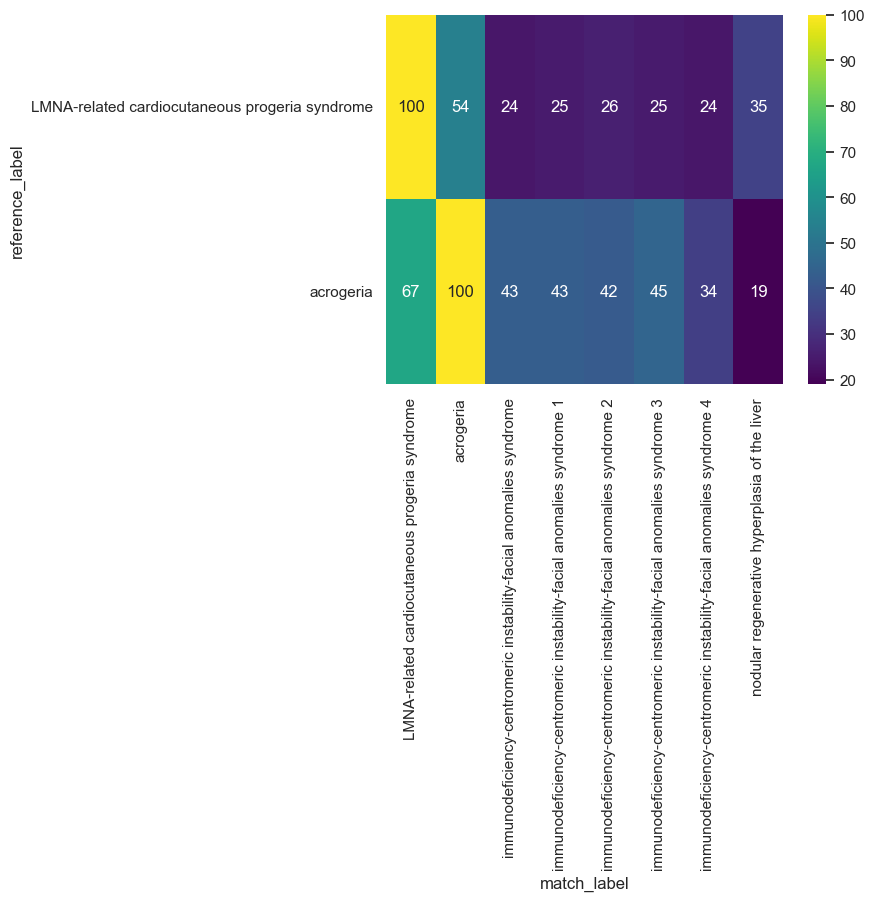

In [73]:
sns.heatmap(sim_matrix, annot=True, fmt="g", cmap='viridis')
plt.show()